In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler

# Load and preprocess the data
data = pd.read_csv("btc_timestampdata.csv")

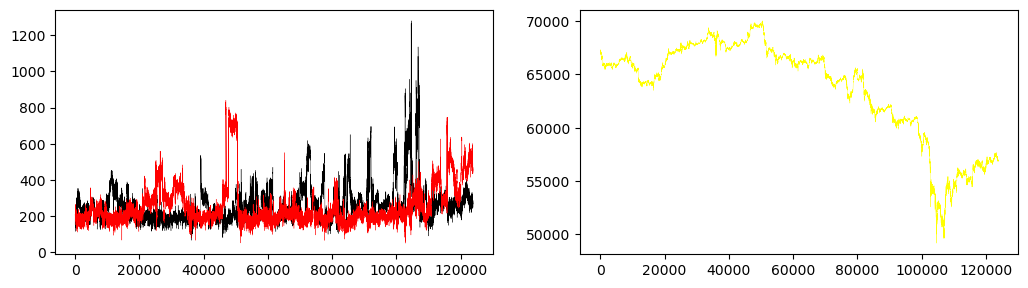

In [3]:
df = pd.DataFrame(data)
fig = plt.figure(figsize=(19.2, 10.8))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax1.plot(df['volume_5000_bids'], color="black", linewidth=0.25)
ax1.plot(df['volume_5000_asks'], color="red", linewidth=0.25)
ax2.plot(df['price'], color="yellow", linewidth=0.25)

In [5]:
df.head()

,timestamp,price,volume_5000_bids,volume_5000_asks,weighted_avg_bid_price,weighted_avg_ask_price
0,2024-07-23 14:33:50.009085,66987.79,152.78328,209.15026,66772.981760,67131.332978
1,2024-07-23 14:33:59.590078,66995.99,179.52510,194.96639,66803.820861,67141.293178
2,2024-07-23 14:34:09.540737,67006.00,179.30086,224.95136,66807.176410,67185.087093
3,2024-07-23 14:34:19.585196,67000.00,177.49621,223.64848,66805.490754,67185.222156
4,2024-07-23 14:34:29.631053,67018.00,181.17591,221.95215,66815.652065,67192.185957


In [4]:
df['volumeDif']=df['volume_5000_bids']-df['volume_5000_asks']

In [6]:
profit = 0
profitArr = []
currOpen = 0
numberOfDeals = 0

for index, row in df.iterrows():
    if row['volumeDif']>=100 and currOpen==0:
        currOpen=row['price']
    elif row['volumeDif']<0 and currOpen!=0:
        profit+=(row['price']-currOpen)-0.002*currOpen
        profitArr.append(profit)
        currOpen=0
        numberOfDeals+=1
print(profit, numberOfDeals)

-24594.355799999987 126


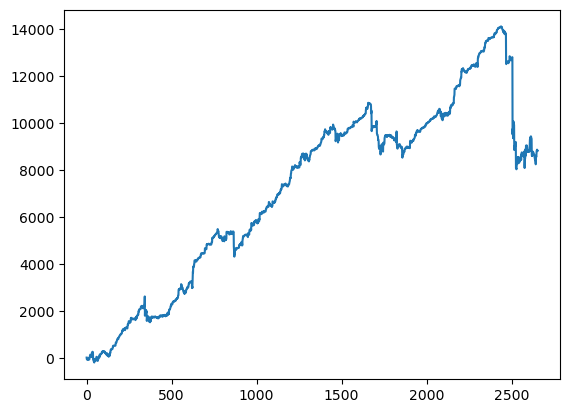

In [9]:
plt.plot(profitArr)